# Copper speciation calculations

using PHREEQC

In [20]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt(1:n-6);
PHREEQCpath=[rootpath,'runPHREEQC'];
addpath(PHREEQCpath);
% clear data and number format
clear; format short e

% turn off warnings
warning off

In [21]:
pH=[4.5 5 7 8.5]; 
CuT=1e-6; NO3T=2*CuT; CT=1e-3; NaT=1*CT;
T=25; pe=20.75-pH; acid=['NaOH'];
totalnames=[{'Cu'}; {'C(+4)'}; {'Na'}]; 
minerals=[{'Tenorite'};{'CuCO3'};{'Malachite'};{'Azurite'}]; 
speciesexport=[{'Cu+2'}];
database=['Marsac2017EuIIIsolids.dat']; show=0; %0 no output to screen. 1 output to screen

In [22]:
for k=1:length(pH);
    totalvector=[CuT; CT; NaT]; pe=20.75-pH(k);
    [solutionspeciesconcs, speciesnames, solidconcs, solidnames]=...
    runPHREEQCv2noHA(T,pH(k),pe,totalnames,totalvector,minerals,speciesexport,database,show,acid);
    for i=1:length(solidconcs)
         tst=cell2mat(solidnames(i));
         for j=1:length(tst)
             if tst(j)=='('; tst(j)='L'; end
             if tst(j)==')'; tst(j)='R'; end
             if tst(j)==':'; tst(j)='C'; end
             if tst(j)=='.'; tst(j)='p'; end
         end
         txt=[tst,'=solidconcs(i);']; eval(txt); % take out the semicolon after (i) if you want to see the solids listed with concs
    end
    freeCu(k)=solutionspeciesconcs(1);
    TenoriteV(k)=Tenorite; CuCO3V(k)=CuCO3; MalachiteV(k)=Malachite; AzuriteV(k)=Azurite;    
end

ans =          0


ans =          0


ans =          0


ans =          0


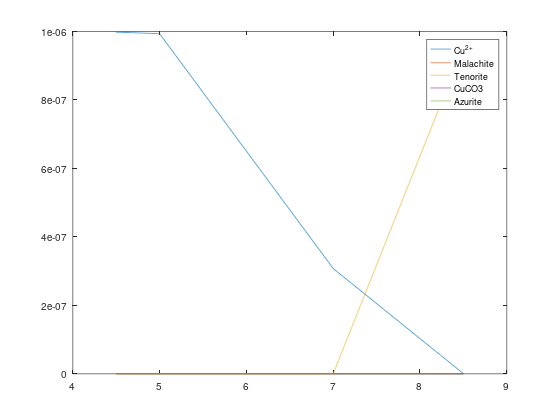

In [23]:
plot(pH,freeCu,pH,MalachiteV,pH,TenoriteV,pH,CuCO3V,pH,AzuriteV)
legend('Cu^{2+}','Malachite','Tenorite','CuCO3','Azurite')

In [27]:
show=[pH' log10(freeCu)' MalachiteV' TenoriteV' CuCO3V' AzuriteV']

show,1,2,3,4,5,6
1,4.5,-6.0008,0,0,0,0
2,5,-6.00281,0,0,0,0
3,7,-6.51215,0,0,0,0
4,8.5,-9.2934,0,9.54202e-07,0,0
